In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [6]:
leg = df[df.Class == 0]
ill = df[df.Class == 1]

In [7]:
print(leg.shape)
print(ill.shape)

(284315, 31)
(492, 31)


In [8]:
leg_sample = leg.sample(n=492)

In [9]:
new_df = pd.concat([leg_sample, ill], axis=0)

In [10]:
new_df['Class'].value_counts()

,count
Class,
0,492
1,492


In [11]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97268.091463,-0.067568,0.024535,0.013168,-0.046415,-0.042245,0.034634,0.003564,0.041247,-0.054986,...,-0.045814,0.009825,0.023168,-0.028191,-0.032144,-0.054355,-0.005586,-0.003822,0.014018,88.597114
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, stratify=Y, random_state=2)

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

In [59]:
lin = SVC(kernel='linear')
lin.fit(X_train, y_train)
predictions = lin.predict(X_test)
print("Accuracy for linear Kernel:")
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy for linear Kernel:
Accuracy: 0.918918918918919


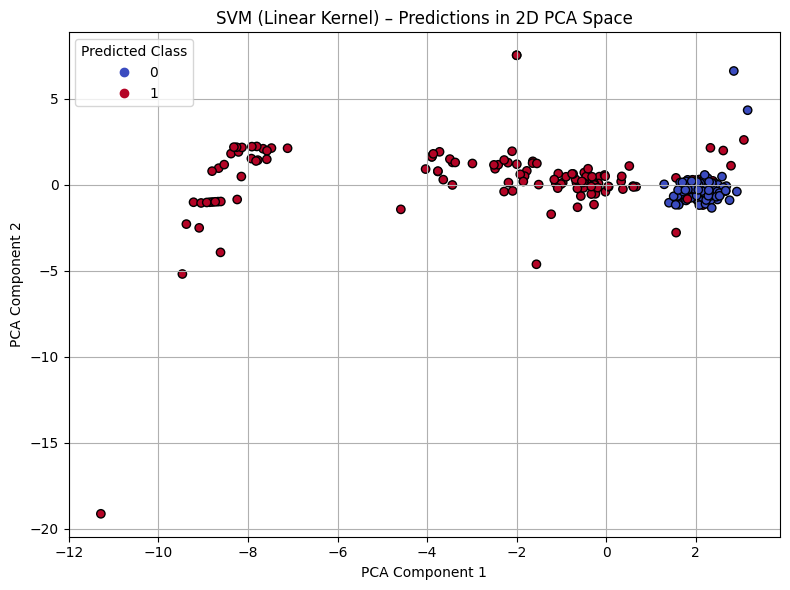

In [53]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='coolwarm', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM (Linear Kernel) – Predictions in 2D PCA Space")
plt.legend(*scatter.legend_elements(), title="Predicted Class")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
rbf.fit(X_train, y_train)
predictions_rbf = rbf.predict(X_test)
print("Accuracy for RBF Kernel:")
print("Accuracy:", accuracy_score(y_test, predictions_rbf))

Accuracy for RBF Kernel:
Accuracy: 0.9087837837837838


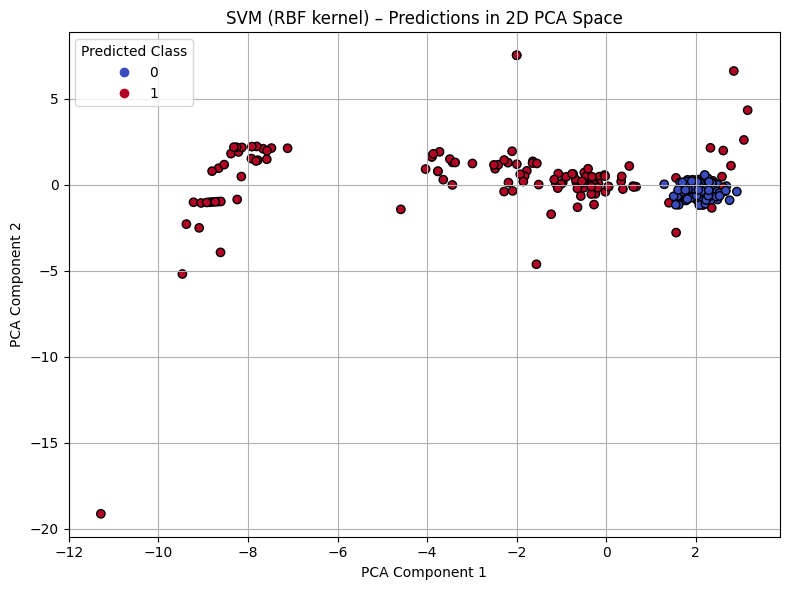

In [55]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions_rbf, cmap='coolwarm', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM (RBF kernel) – Predictions in 2D PCA Space")
plt.legend(*scatter.legend_elements(), title="Predicted Class")
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
pol = SVC(kernel='poly',degree=3, C=1.0, gamma='scale',coef0=1)
pol.fit(X_train, y_train)
predictions_pol = pol.predict(X_test)
print("Accuracy for Poly Kernel:")
print("Accuracy:", accuracy_score(y_test, predictions_pol))

Accuracy for Poly Kernel:
Accuracy: 0.9155405405405406


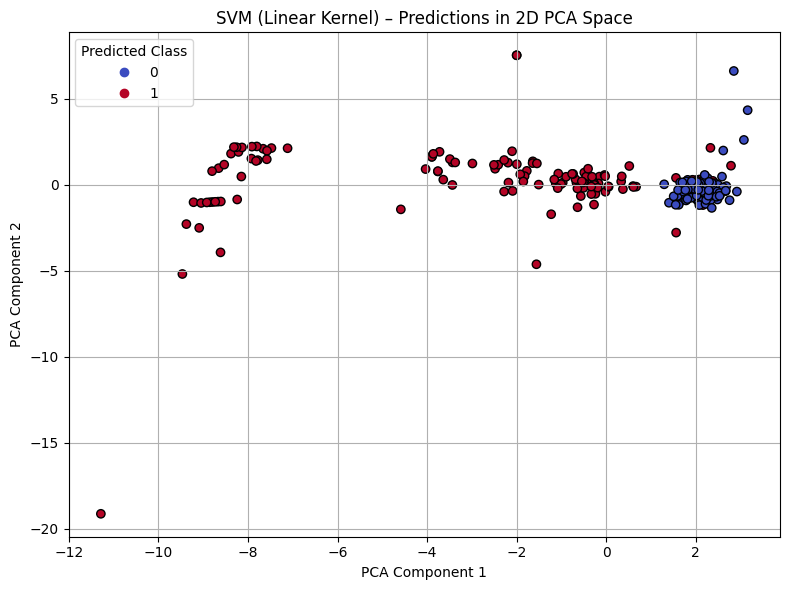

In [57]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions_pol, cmap='coolwarm', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM (Linear Kernel) – Predictions in 2D PCA Space")
plt.legend(*scatter.legend_elements(), title="Predicted Class")
plt.grid(True)
plt.tight_layout()
plt.show()